2.1 Dataset para Entrenamiento

In [3]:
# Carga del dataset MNIST
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exploración inicial de los datos
print(f"Forma del dataset de entrenamiento: {x_train.shape}")
print(f"Forma de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Forma del dataset de prueba: {x_test.shape}")
print(f"Forma de las etiquetas de prueba: {y_test.shape}")

Forma del dataset de entrenamiento: (60000, 28, 28)
Forma de las etiquetas de entrenamiento: (60000,)
Forma del dataset de prueba: (10000, 28, 28)
Forma de las etiquetas de prueba: (10000,)


2.2 Análisis Exploratorio y Visualización

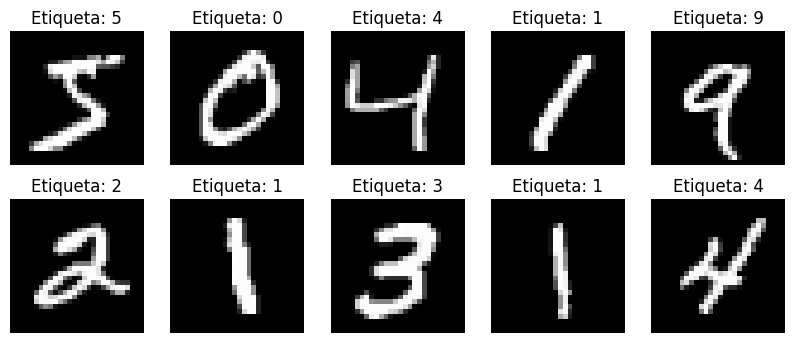

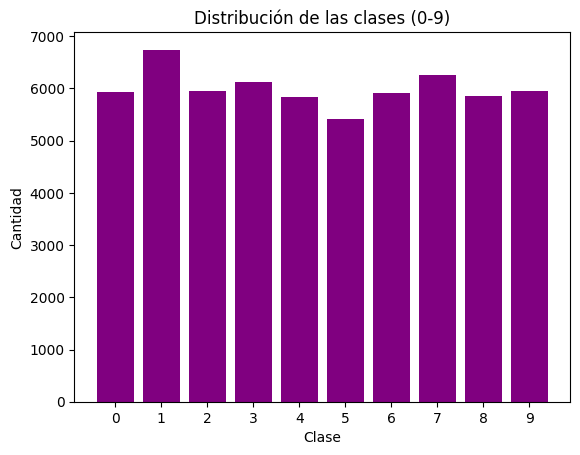

In [4]:

# Librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Visualización de imágenes de ejemplo
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

# Visualizar la distribución de las clases con matplotlib
plt.hist(y_train, bins=np.arange(11) - 0.5, rwidth=0.8, color="purple")
plt.xticks(range(10))
plt.title("Distribución de las clases (0-9)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

# Visualización interactiva con plotly
fig = px.histogram(y_train, nbins=10, title="Distribución de Clases", labels={'value': 'Clase', 'count': 'Cantidad'})
fig.show()


2.3 Limpieza y Preprocesamiento de Imágenes

In [5]:
# Normalización de las imágenes al rango [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Añadimos una dimensión de canal a las imágenes
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Forma de las imágenes procesadas: {x_train.shape}")

Forma de las imágenes procesadas: (60000, 28, 28, 1)


2.4 División de Datos: Entrenamiento, Validación y Test

In [6]:
# División del dataset en conjuntos de entrenamiento y validación usando división estratificada
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_idx, val_idx in split.split(x_train, y_train):
    x_train_split, x_val_split = x_train[train_idx], x_train[val_idx]
    y_train_split, y_val_split = y_train[train_idx], y_train[val_idx]

# Verificación de las formas
print(f"Conjunto de entrenamiento: {x_train_split.shape}, {y_train_split.shape}")
print(f"Conjunto de validación: {x_val_split.shape}, {y_val_split.shape}")
print(f"Conjunto de prueba: {x_test.shape}, {y_test.shape}")

Conjunto de entrenamiento: (51000, 28, 28, 1), (51000,)
Conjunto de validación: (9000, 28, 28, 1), (9000,)
Conjunto de prueba: (10000, 28, 28, 1), (10000,)


3.1 Definición del Problema y Enfoque


In [ ]:
"""
Problema: Clasificación de imágenes (dígitos del 0 al 9).
Objetivo: Identificar correctamente los dígitos en imágenes con alta precisión para automatizar el ruteo de paquetes.
"""

3.2 Arquitectura de la Red Neuronal Convolucional

In [7]:
# Importar librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Definir la arquitectura de la CNN
model = Sequential([
    # Primera capa convolucional + Batch Normalization + MaxPooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Segunda capa convolucional + Batch Normalization + MaxPooling
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Tercera capa convolucional + Batch Normalization
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),

    # Flatten para vectorizar las características
    Flatten(),

    # Capa densa con Dropout
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Capa de salida con activación softmax
    Dense(10, activation='softmax')
])

# Mostrar el resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,306 (1.49 MB)

 Trainable params: 390,858 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

3.3 Estrategia de Mejora y Experimentación

In [8]:
# Importar librerías adicionales para optimización
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Compilar el modelo
model.compile(
    optimizer='adam',  # Optimizador Adam
    loss='sparse_categorical_crossentropy',  # Pérdida categórica para clasificación
    metrics=['accuracy']  # Métrica de precisión
)

3.4 Función de Pérdida y Optimizadores

In [9]:
# Entrenar el modelo
history = model.fit(
    x_train_split, y_train_split,  # Datos de entrenamiento
    validation_data=(x_val_split, y_val_split),  # Datos de validación
    epochs=20,  # Número de épocas
    batch_size=64,  # Tamaño de batch
    callbacks=[early_stopping, reduce_lr]  # Callbacks para mejorar el entrenamiento
)

Epoch 1/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 88s 103ms/step - accuracy: 0.9161 - loss: 0.2769 - val_accuracy: 0.9834 - val_loss: 0.0617 - learning_rate: 0.0010
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.9804 - loss: 0.0661 - val_accuracy: 0.9864 - val_loss: 0.0586 - learning_rate: 0.0010
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy: 0.9880 - loss: 0.0415 - val_accuracy: 0.9862 - val_loss: 0.0560 - learning_rate: 0.0010
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 75s 94ms/step - accuracy: 0.9887 - loss: 0.0397 - val_accuracy: 0.9873 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 77s 97ms/step - accuracy: 0.9906 - loss: 0.0309 - val_accuracy: 0.9881 - val_loss: 0.0512 - learning_rate: 0.0010
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9916 - loss: 0.0275 - val_accuracy: 0.9880 - val_loss: 0.0514 - learning_rate: 0.0010
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 84s 100ms/step - accuracy: 0.9927 -

Evaluación del Modelo

In [10]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9926 - loss: 0.0302
Pérdida en el conjunto de prueba: 0.02823476493358612
Precisión en el conjunto de prueba: 0.9939000010490417


Visualización del Entrenamiento

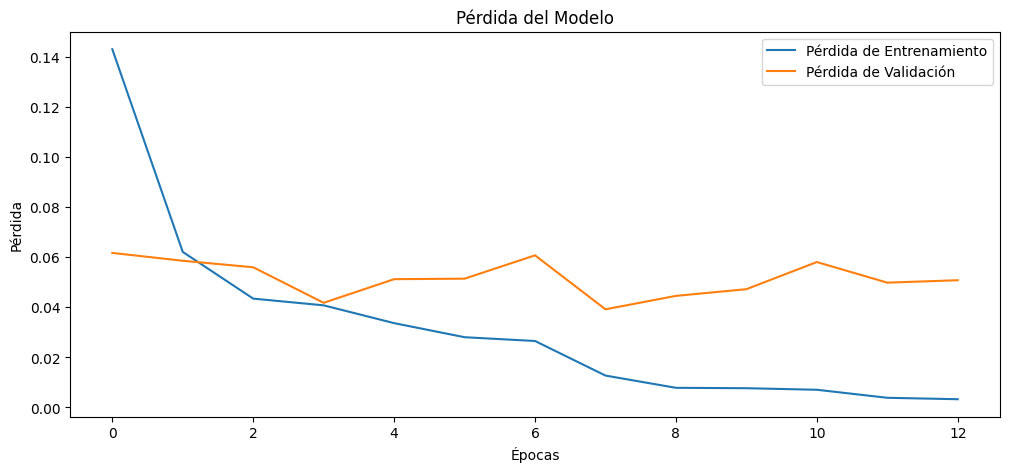

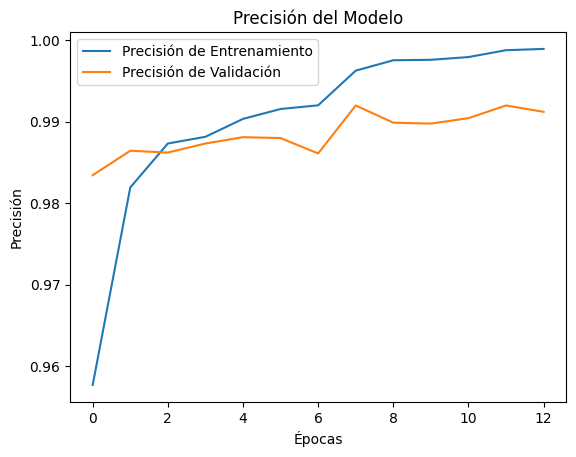

In [11]:
# Importar librería para graficar
import matplotlib.pyplot as plt

# Visualizar la pérdida
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Visualizar la precisión
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

4.1 Diseño e Implementación del Modelo

In [12]:
# Importar librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Construir el modelo CNN
model_base = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten para vectorizar las características
    Flatten(),

    # Capa fully connected
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Capa de salida
    Dense(10, activation='softmax')
])

# Modelo mejorado con una capa adicional de convolución
model_improved = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa adicional de convolución
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten para vectorizar las características
    Flatten(),

    # Capa fully connected
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Capa de salida
    Dense(10, activation='softmax')
])

4.2 Entrenamiento y Validación

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Compilar el modelo base
model_base.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo base
history_base = model_base.fit(
    x_train_split, y_train_split,
    validation_data=(x_val_split, y_val_split),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)

# Compilar el modelo mejorado
model_improved.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo mejorado
history_improved = model_improved.fit(
    x_train_split, y_train_split,
    validation_data=(x_val_split, y_val_split),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 70s 84ms/step - accuracy: 0.8621 - loss: 0.4752 - val_accuracy: 0.9778 - val_loss: 0.0804 - learning_rate: 0.0010
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9707 - loss: 0.0979 - val_accuracy: 0.9814 - val_loss: 0.0658 - learning_rate: 0.0010
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 67s 84ms/step - accuracy: 0.9780 - loss: 0.0730 - val_accuracy: 0.9827 - val_loss: 0.0684 - learning_rate: 0.0010
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.9810 - loss: 0.0613 - val_accuracy: 0.9866 - val_loss: 0.0525 - learning_rate: 0.0010
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 67s 84ms/step - accuracy: 0.9853 - loss: 0.0499 - val_accuracy: 0.9874 - val_loss: 0.0512 - learning_rate: 0.0010
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.9859 - loss: 0.0451 - val_accuracy: 0.9882 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9883 - l

4.3 Experimentación y Comparación de Modelos

In [14]:
# Comparar cantidad de parámetros
print("Modelo Base:")
model_base.summary()
print("\nModelo Mejorado:")
model_improved.summary()

# Evaluación en conjunto de prueba
test_loss_base, test_accuracy_base = model_base.evaluate(x_test, y_test)
test_loss_improved, test_accuracy_improved = model_improved.evaluate(x_test, y_test)

print(f"Modelo Base - Pérdida: {test_loss_base}, Precisión: {test_accuracy_base}")
print(f"Modelo Mejorado - Pérdida: {test_loss_improved}, Precisión: {test_accuracy_improved}")

Modelo Base:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,872 (2.58 MB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 450,454 (1.72 MB)


Modelo Mejorado:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,344 (770.88 KB)

 Trainable params: 65,674 (256.54 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 131,350 (513.09 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9905 - loss: 0.0386
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9836 - loss: 0.0667
Modelo Base - Pérdida: 0.03247658535838127, Precisión: 0.9919000267982483
Modelo Mejorado - Pérdida: 0.05306125059723854, Precisión: 0.9873999953269958


4.4 Validación Cruzada y Selección Final

In [15]:
from sklearn.model_selection import KFold
import numpy as np

# Preparar datos para validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
val_acc_scores = []

for train_idx, val_idx in kfold.split(x_train_split):
    x_train_k, x_val_k = x_train_split[train_idx], x_train_split[val_idx]
    y_train_k, y_val_k = y_train_split[train_idx], y_train_split[val_idx]

    # Crear una nueva instancia del modelo mejorado
    model_cv = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model_cv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrenar en cada fold
    model_cv.fit(x_train_k, y_train_k, validation_data=(x_val_k, y_val_k), epochs=10, batch_size=64, verbose=0)
    val_loss, val_acc = model_cv.evaluate(x_val_k, y_val_k, verbose=0)
    val_acc_scores.append(val_acc)

# Resultados de validación cruzada
print(f"Precisión promedio en validación cruzada: {np.mean(val_acc_scores)}")

Precisión promedio en validación cruzada: 0.9854705810546875


5.1 Análisis Cuantitativo de las Métricas

In [16]:
# Evaluar el modelo base
test_loss_base, test_accuracy_base = model_base.evaluate(x_test, y_test)
print(f"Modelo Base - Pérdida en el conjunto de prueba: {test_loss_base}")
print(f"Modelo Base - Precisión en el conjunto de prueba: {test_accuracy_base}")

# Evaluar el modelo mejorado
test_loss_improved, test_accuracy_improved = model_improved.evaluate(x_test, y_test)
print(f"Modelo Mejorado - Pérdida en el conjunto de prueba: {test_loss_improved}")
print(f"Modelo Mejorado - Precisión en el conjunto de prueba: {test_accuracy_improved}")

# Comparación de parámetros y tiempos de entrenamiento
print("\nModelo Base:")
model_base.summary()
print("\nModelo Mejorado:")
model_improved.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9905 - loss: 0.0386
Modelo Base - Pérdida en el conjunto de prueba: 0.03247658535838127
Modelo Base - Precisión en el conjunto de prueba: 0.9919000267982483
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9836 - loss: 0.0667
Modelo Mejorado - Pérdida en el conjunto de prueba: 0.05306125059723854
Modelo Mejorado - Precisión en el conjunto de prueba: 0.9873999953269958

Modelo Base:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,872 (2.58 MB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 450,454 (1.72 MB)


Modelo Mejorado:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,344 (770.88 KB)

 Trainable params: 65,674 (256.54 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 131,350 (513.09 KB)

5.2 Visualización de Resultados

Curvas de Entrenamiento y Validación

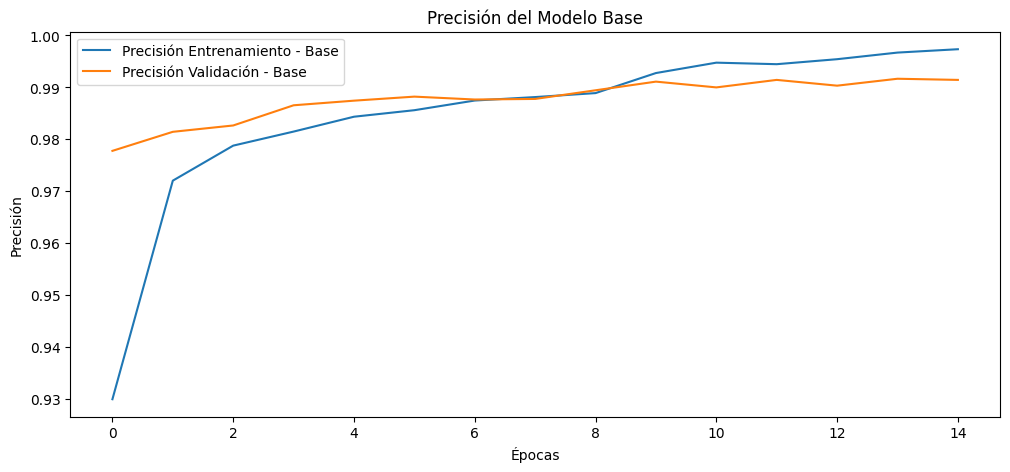

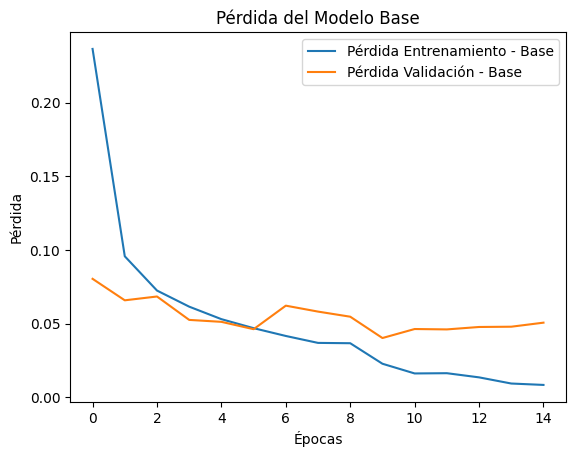

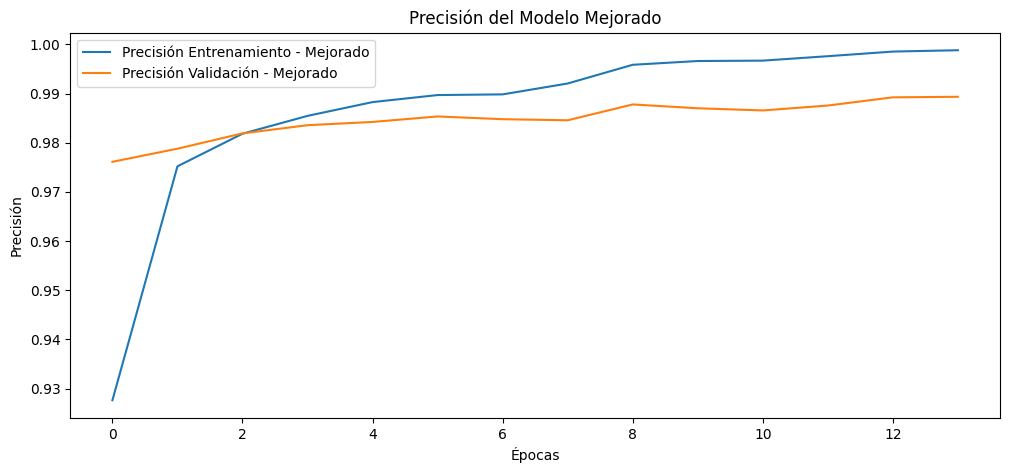

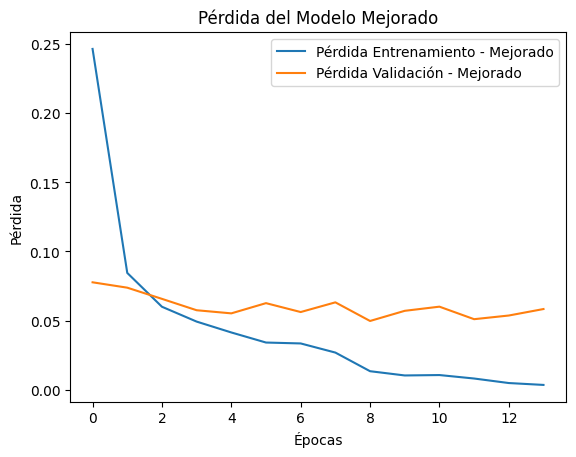

In [17]:
import matplotlib.pyplot as plt

# Curvas del modelo base
plt.figure(figsize=(12, 5))
plt.plot(history_base.history['accuracy'], label='Precisión Entrenamiento - Base')
plt.plot(history_base.history['val_accuracy'], label='Precisión Validación - Base')
plt.title('Precisión del Modelo Base')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history_base.history['loss'], label='Pérdida Entrenamiento - Base')
plt.plot(history_base.history['val_loss'], label='Pérdida Validación - Base')
plt.title('Pérdida del Modelo Base')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Curvas del modelo mejorado
plt.figure(figsize=(12, 5))
plt.plot(history_improved.history['accuracy'], label='Precisión Entrenamiento - Mejorado')
plt.plot(history_improved.history['val_accuracy'], label='Precisión Validación - Mejorado')
plt.title('Precisión del Modelo Mejorado')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history_improved.history['loss'], label='Pérdida Entrenamiento - Mejorado')
plt.plot(history_improved.history['val_loss'], label='Pérdida Validación - Mejorado')
plt.title('Pérdida del Modelo Mejorado')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Matriz de Confusión

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


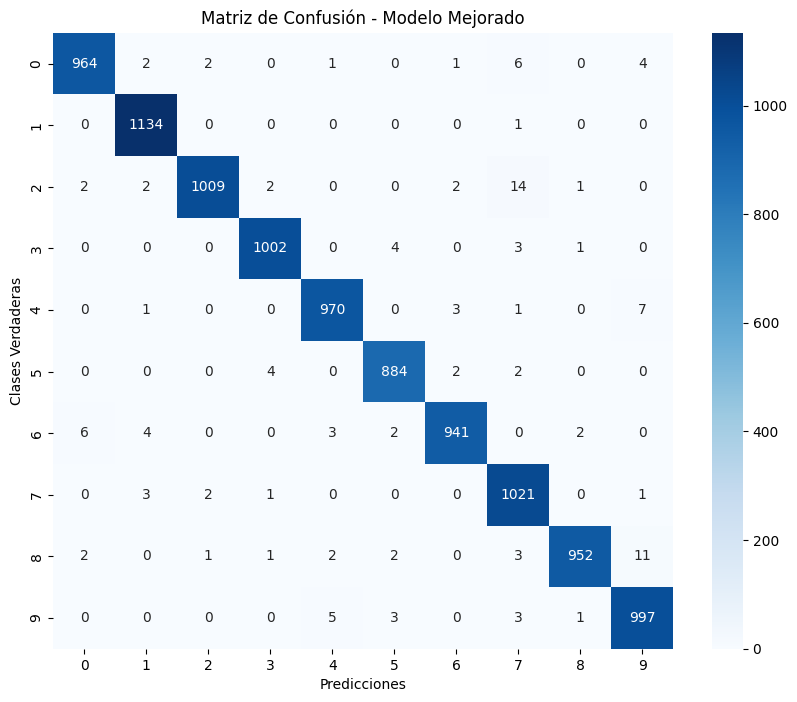

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicciones del modelo mejorado
y_pred = model_improved.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusión - Modelo Mejorado')
plt.xlabel('Predicciones')
plt.ylabel('Clases Verdaderas')
plt.show()

Análisis de Errores

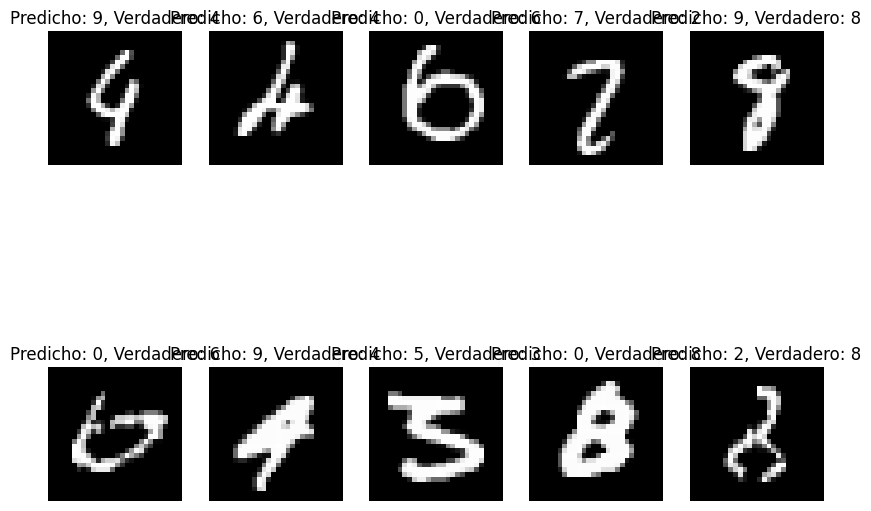

In [19]:
# Filtrar ejemplos mal clasificados
misclassified_idx = np.where(y_test != y_pred_classes)[0]

# Visualizar ejemplos mal clasificados
plt.figure(figsize=(10, 8))
for i, idx in enumerate(misclassified_idx[:10]):  # Mostrar primeros 10 errores
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicho: {y_pred_classes[idx]}, Verdadero: {y_test[idx]}")
    plt.axis('off')
plt.show()

6.1 Serialización y Almacenamiento del Modelo

In [20]:
# Serializar y guardar el modelo en formato .h5
model_base.save('modelo_base.h5')
print("Modelo guardado exitosamente en formato .h5")

Modelo guardado exitosamente en formato .h5


In [21]:
# Serializar y guardar el modelo en formato .h5
model_improved.save('modelo_improved.h5')
print("Modelo guardado exitosamente en formato .h5")

Modelo guardado exitosamente en formato .h5
